In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import struct
import scipy

#from Signal_v2 import * 

#import pywt
exec(open("Signal_v2.py").read(), globals()) # réexecuter le cellule permet de prendre en compte les modifs du fichiers fonctions.py
exec(open("Analisys_functions.py").read(), globals()) # réexecuter le cellule permet de prendre en compte les modifs du fichiers fonctions.py

In [2]:
FREQ = [[1],[1, 50, 10],[1,5,10,20,50,100,200,500],[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]]
NOM = ["Sinusoide","Sinusoide triple","Sinusoide octuple",'Sinusoide crenau']
INTENSITY = [None, None,None,[4, 4./3, 1, 4./5, 4./7, 4./9, 4./11, 4./13, 4./15, 4./17, 4./19]]
A = [0,0,0,0]
B = [1,10,5,10]
NB_POINTS = [100,10000,1000,10000]
signaux = signaux_test(FREQ, A,B,NB_POINTS,INTENSITY,NOM)

#signaux physique
data_list0 = ouverture_fichier("bt0VV_4lks_d45-60_dt4h.dat")
data_list1 = ouverture_fichier("tst.dat")

signaux += [Signal(signal = np.asarray(data_list0)[:,2].astype(float),nom= "signal radar")]
humidite = []
for i,j in enumerate(range(2,11)):
    s = np.asarray(data_list1)[:,j].astype(float)
    nom = 'fichier "tst.dat" signal '+str(i)
    signal = Signal(s, nom)
    humidite += [signal]
    signaux += [signal]

In [3]:
signal_test = signaux[7].signal

In [4]:
def moyenne_glissante(signal, taille_fenetre):
    """moyenne glissante avec effet aux bords modifies (pour éviter une périodisation)"""
    signal_moyenne = np.zeros(len(signal))
   # signal_moyenne[0] = signal[0]
    for i in range(0, taille_fenetre):  # moyenne non centre
        signal_moyenne[i] = signal[:taille_fenetre+i:].mean()  
    for i in range(taille_fenetre, len(signal)-taille_fenetre):
        signal_moyenne[i] = np.roll(signal, -i+taille_fenetre)[:taille_fenetre*2:].mean()
    for i in range(len(signal)-taille_fenetre, len(signal)):
        signal_moyenne[i] = signal[i-taille_fenetre::].mean()
    return signal_moyenne

#moyenne_glissante(signal_test, 10)

In [40]:
def suppr_peaks(signal,taille_fenetre , seuil): 

    signal_nettoyer = signal.copy()
    signal_moyenne = moyenne_glissante(signal, taille_fenetre)
    nbre_Pics = 0
    for i in range(len(signal)):
        if(np.linalg.norm(signal[i] - signal_moyenne[i]) > seuil):
            nbre_Pics += 1
            signal_nettoyer[i] = signal_moyenne[i]   # faut faire la moyenne sans les pics, de plus y a potentiellemnt deux pivs qui se suivent, il faut donc enlever tou les pics puis leur mettre de novelles valeurs
    print("The number of deleted peacks is ", nbre_Pics, " in other words ", nbre_Pics*100/len(signal_nettoyer), " %.")
    
    return signal_nettoyer

In [36]:
Indice_signaux_a_deshumidifier = [7, 8, 11]
SP = []
for i in range(5, len(signaux)):
    print("signal ", i)
    SP += [suppr_peaks(signaux[i].signal, 300, 1*np.var(signaux[i].signal))]

signal  5
Le nombre de pics supprimé est  482  soir un pourcentage  0.05578703703703704
signal  6
Le nombre de pics supprimé est  420  soir un pourcentage  0.04861111111111111
signal  7
Le nombre de pics supprimé est  348  soir un pourcentage  0.04027777777777778
signal  8
Le nombre de pics supprimé est  2  soir un pourcentage  0.0002314814814814815
signal  9
Le nombre de pics supprimé est  147  soir un pourcentage  0.017013888888888887
signal  10
Le nombre de pics supprimé est  0  soir un pourcentage  0.0
signal  11
Le nombre de pics supprimé est  127  soir un pourcentage  0.014699074074074074
signal  12
Le nombre de pics supprimé est  63  soir un pourcentage  0.007291666666666667
signal  13
Le nombre de pics supprimé est  0  soir un pourcentage  0.0


Peaks : 
Fourrier Transform :  ['1.0']
Computation of the autocorralation
 [                              ] 0.7%                                      

/usr/local/insa/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in log10
/usr/local/insa/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10


 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.0%                                    
Power Spectral Density :  ['1.0']


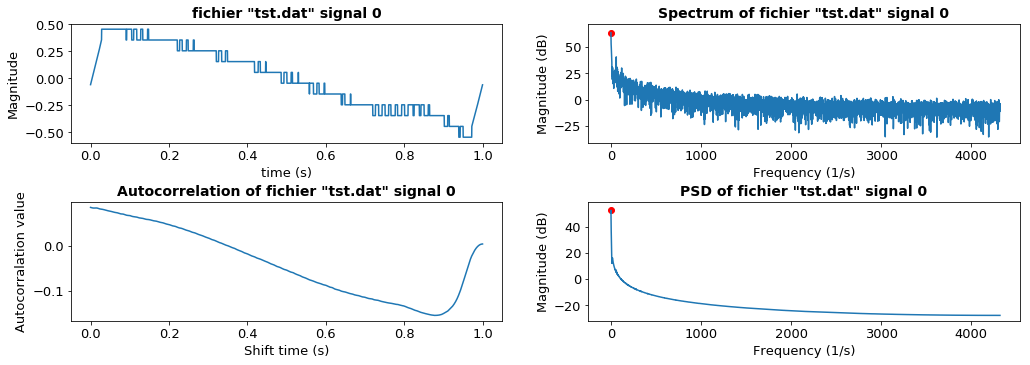



Peaks : 
Fourrier Transform :  ['1.0' '3.0' '5.0' '12.0' '7.000000000000001' '21.0' '16.0'
 '60.00000000000001' '25.000000000000004' '23.0']
Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.0%                                    
Power Spectral Density :  ['1.0' '5.0' '8.0' '14.000000000000002']


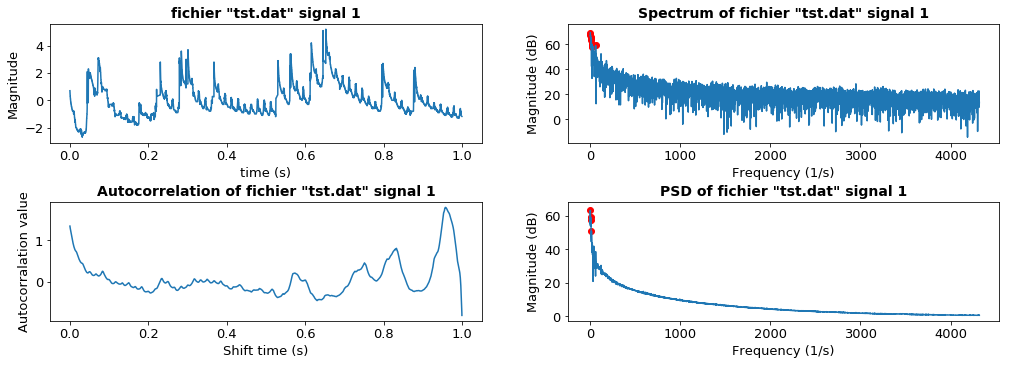



Peaks : 
Fourrier Transform :  ['2.0' '5.0' '7.000000000000001' '12.0' '21.0' '14.000000000000002'
 '28.000000000000004' '39.00000000000001' '26.0']
Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.0%                                    
Power Spectral Density :  ['5.0' '2.0' '7.000000000000001' '14.000000000000002']


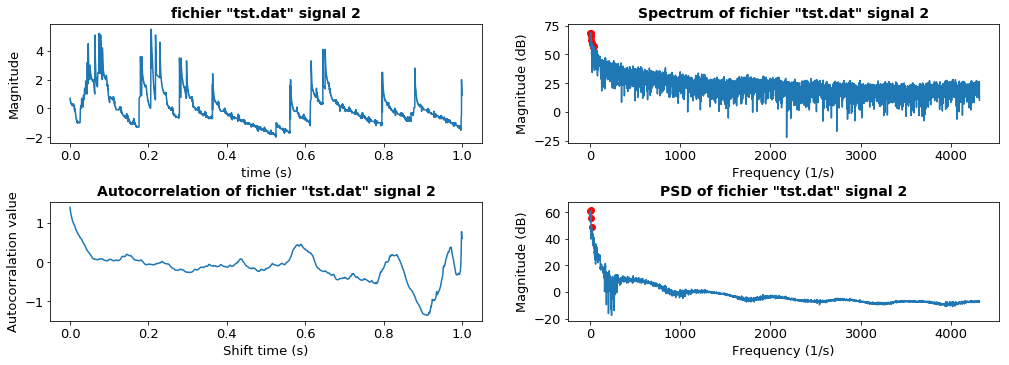



Peaks : 
Fourrier Transform :  ['60.00000000000001' '2.0' '5.0']
Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.0%                                    
Power Spectral Density :  ['60.00000000000001' '2.0']


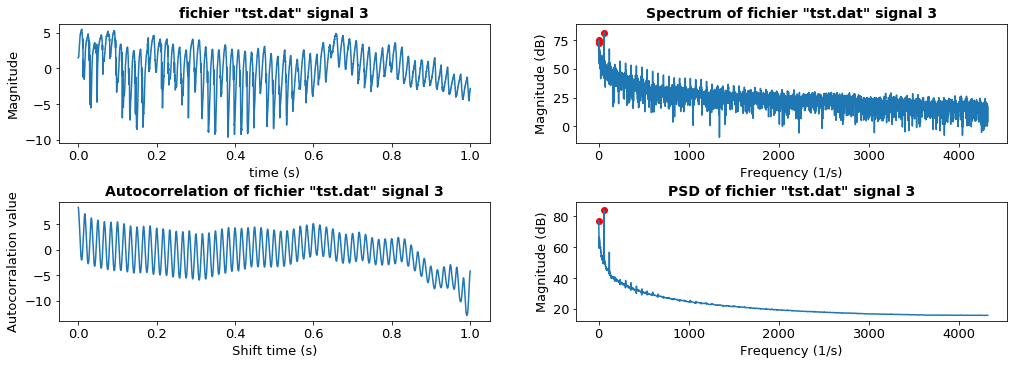



Peaks : 
Fourrier Transform :  ['1.0' '4.0' '60.00000000000001' '14.000000000000002']
Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.0%                                    
Power Spectral Density :  ['1.0' '4.0']


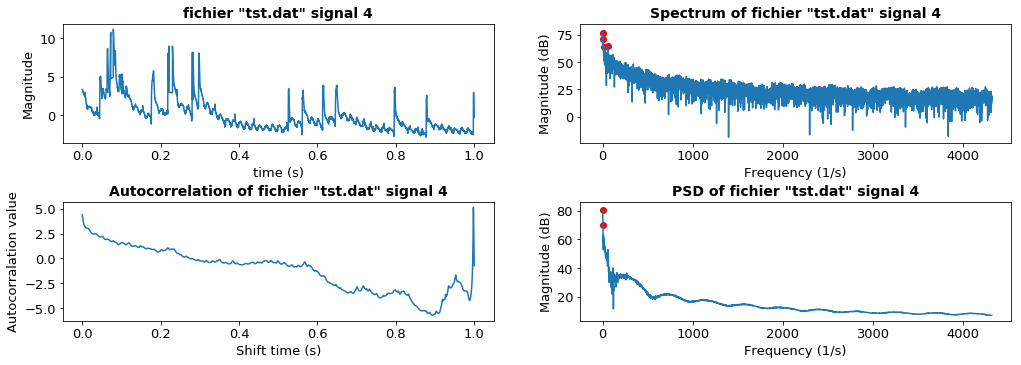



Peaks : 
Fourrier Transform :  ['1.0' '5.0' '60.00000000000001']
Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.0%                                    
Power Spectral Density :  ['0.0']


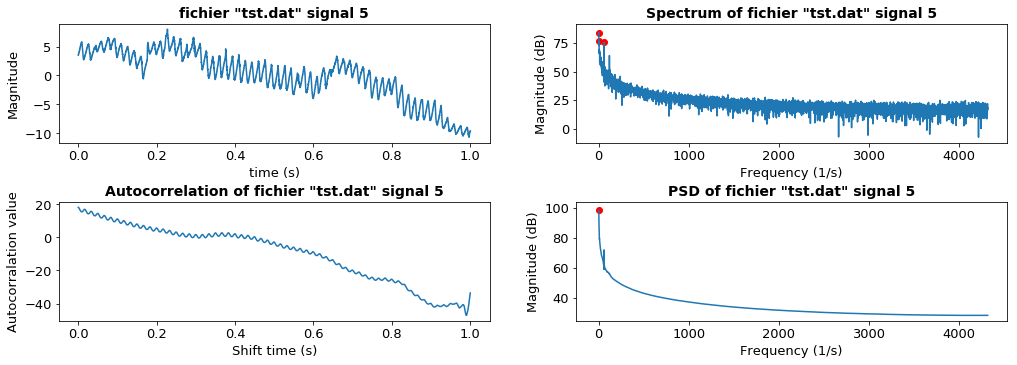



Peaks : 
Fourrier Transform :  ['1.0' '5.0' '7.000000000000001' '9.0' '14.000000000000002' '12.0'
 '60.00000000000001' '23.0' '30.000000000000004' '39.00000000000001']
Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.0%                                    
Power Spectral Density :  ['0.0' '5.0' '7.000000000000001']


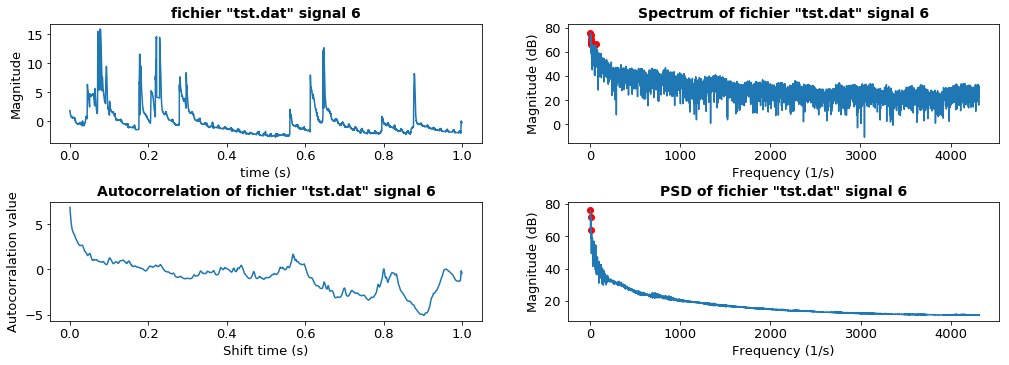



Peaks : 
Fourrier Transform :  ['1.0' '60.00000000000001' '5.0']
Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.0%                                    
Power Spectral Density :  ['0.0']


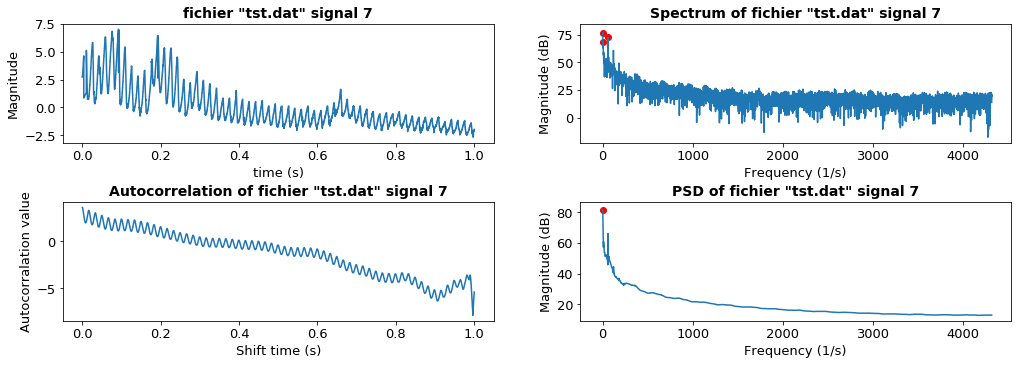



Peaks : 
Fourrier Transform :  ['2.0' '60.00000000000001' '5.0' '10.0']
Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.0%                                    
Power Spectral Density :  ['2.0' '9.0']


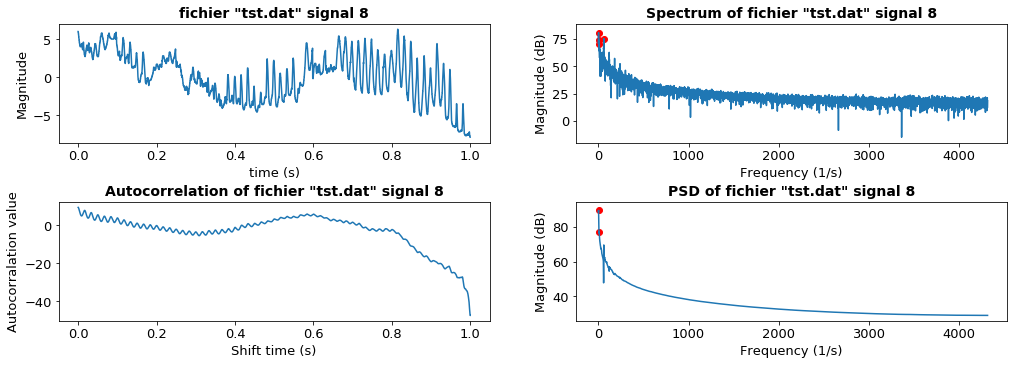

In [37]:
exec(open("Signal_v2.py").read(), globals()) #réexecuter le cellule permet de prendre en compte les modifs du fichiers fonctions.py
exec(open("Analisys_functions.py").read(), globals()) 

for i,j in enumerate(range(0, len(signaux))):  
    SP[i] = np.array(SP[i])
    SP[i] = SP[i] - np.mean(SP[i])
    s=Signal(SP[i], a = signaux[j].a, b = signaux[j].b, nom = signaux[j].nom)
    s.analyse_signal(nb_peaks=10,window_type='rectangular',time_unit = 's')
plt.show()

The number of deleted peacks is  420  in other words  4.861111111111111  %.


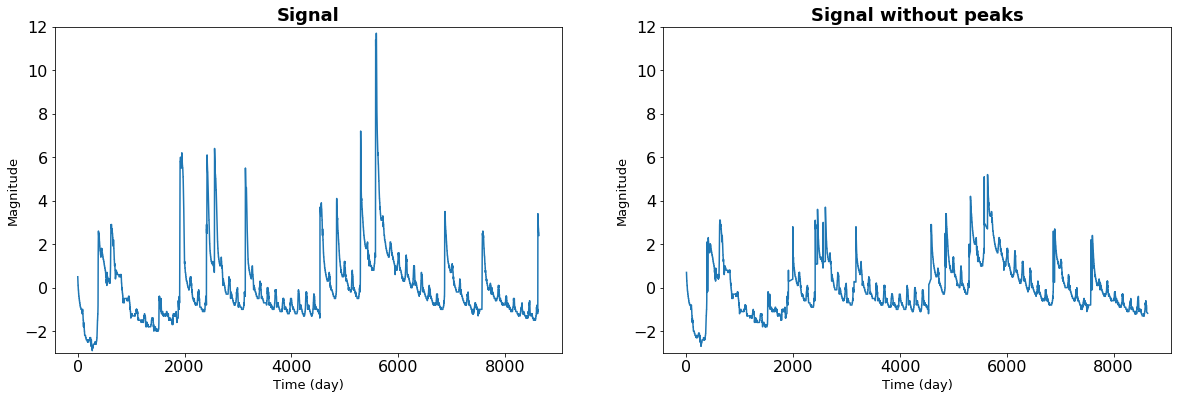

In [47]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.plot(signaux[6].signal - np.mean(signaux[6].signal))
plt.xlabel("Time (day)",fontsize=13)
plt.ylabel("Magnitude",fontsize=13)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-3, 12)
plt.title("Signal",fontsize=18,fontweight="bold")
plt.subplot(1,2,2)
#signal_moyenne = nettoyer(signal_brut)
sp = suppr_peaks(signaux[6].signal, 300, 1*np.var(signaux[6].signal))
plt.plot(sp - sp.mean())
plt.xlabel("Time (day)",fontsize=13)
plt.ylabel("Magnitude",fontsize=13)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Signal without peaks",fontsize=18,fontweight="bold")
plt.ylim(-3, 12)
plt.show()

## Déshumificateur

In [ ]:
# repérer les jours de pluie
#plt.plot(signal_test)
#plt.show()

def diff_finis(signal):
    A = signal[1::]-signal[:1:]
    return [0] + A

def pluie(signal, verbose = False):
    D = diff_finis(signal)
    seuil_pluie = 0.5*D.var() + D.mean()
    Pluie = D > seuil_pluie
    if(verbose == True):
        print("seuil_pluie = ", seuil_pluie)
        print("Le nombre de jour de pluie est : ", sum(Pluie))
    return Pluie


def redresseur_sequence(Sequence, methode = "spline"):
    if(len(Sequence) == 1):
        return [0] # Sequence - Sequence
    elif(methode == "lineaire" or len(Sequence) < 4):
        a, b = scipy.stats.linregress(np.arange(len(Sequence)), Sequence)[:2]    
        return Sequence-a*np.arange(len(Sequence))-b
    elif(methode == "spline"):
        spline = scipy.interpolate.UnivariateSpline(np.arange(len(Sequence)), Sequence)
        Spline = spline(np.arange(len(Sequence))) 
        return Sequence - Spline


def deshumidificateur_sans_pluie(signal, Pluie):
    
    R = []
    c = 0
    while(c < len(Pluie)):
        if(Pluie[c] == False):
            Sequence = [signal[c]]
            c+=1
            while(c < len(Pluie) and Pluie[c] == False):
                Sequence += [signal[c]]
                c+=1
            R += list(redresseur_sequence(Sequence))
            R += [0]
        else:
            R += [0] # jour de pluie à compléter plus tard
        c += 1
    return R

def deshumidificateur(signal):
    taille_fenetre = 10
    Pluie = pluie(signal)
    Des = deshumidificateur_sans_pluie(signal, Pluie)
    for i in range(1, len(Des)-1):
        if(Pluie[i]==True):
            Des[i] = np.mean([Des[i-1], Des[i+1]])
    if(Pluie[0]==True):
        Des[0] = Des[1]
    if(Pluie[-1]==True):
        Des[-1] = Des[-2]
    return Des

# Impact de la fonction déshumidificaiton

In [ ]:
Indice_signaux_a_deshumidifier = [7, 8, 11]
DES = []
for i in Indice_signaux_a_deshumidifier:
    DES += [deshumidificateur(signaux[i].signal)]

In [ ]:
for i,j in enumerate(Indice_signaux_a_deshumidifier):  
    print(signaux[j].nom)
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.plot(signaux[j].signal)
    plt.subplot(1,2,2)
    plt.plot(DES[i])
    plt.show()

## Analyse

In [ ]:
exec(open("Signal_v2.py").read(), globals()) #réexecuter le cellule permet de prendre en compte les modifs du fichiers fonctions.py
exec(open("Analisys_functions.py").read(), globals()) 

for i,j in enumerate(Indice_signaux_a_deshumidifier):  
    DES[i] = np.array(DES[i])
    DES[i] = DES[i] - min(DES[i])
    s=Signal(DES[i], a = signaux[j].a, b = signaux[j].b, nom = signaux[j].nom)
    s.analyse_signal(nb_peaks=10,window_type='rectangular',time_unit = 's')
plt.show()